In [1]:
import requests
import PIL.Image
import pandas as pd

In [2]:
df = pd.read_csv('products_clean.csv')
display(df)

,Brand,Product Name,Product URL,Image URL,Description,Price,Category
0,Clinique,Even Better Clinical Serum Foundation SPF 20,https://www.notino.co.uk/clinique/even-better-...,https://cdn.notinoimg.com/list_2k/clinique/192...,serum foundation SPF 20,29.4,foundation
1,Wet n Wild,Photo Focus,https://www.notino.co.uk/wet-n-wild/photo-focu...,https://cdn.notinoimg.com/list_2k/wet-n-wild/4...,mattifying liquid foundation,4.5,foundation
2,Wet n Wild,Photo Focus,https://www.notino.co.uk/wet-n-wild/photo-focu...,https://cdn.notinoimg.com/list_2k/wet-n-wild/0...,lightweight tinted moisturiser with a brighten...,4.3,foundation
3,Estée Lauder,Double Wear Stay-in-Place Mini,https://www.notino.co.uk/estee-lauder/mini-dou...,https://cdn.notinoimg.com/list_2k/estee-lauder...,long-lasting foundation SPF 10,14.7,foundation
4,Clinique,Anti-Blemish Solutions™ Liquid Makeup,https://www.notino.co.uk/clinique/anti-blemish...,https://cdn.notinoimg.com/list_2k/clinique/207...,"liquid foundation for problematic skin, acne",22.5,foundation
...,...,...,...,...,...,...,...
7684,Maison Tahité,Carnal Cacao,https://www.notino.co.uk/maison-tahite/carnal-...,https://cdn.notinoimg.com/list_2k/maison_tahit...,eau de parfum unisex 100 ml,NaN,eaux-de-parfum
7685,Maison Tahité,Cafe Gourmand,https://www.notino.co.uk/maison-tahite/cafegou...,https://cdn.notinoimg.com/list_2k/maison_tahit...,eau de parfum unisex 100 ml,NaN,eaux-de-parfum
7686,Afnan,Highness IX,https://www.notino.co.uk/afnan/highness-ix-eau...,https://cdn.notinoimg.com/list_2k/afnan/629017...,eau de parfum unisex 100 ml,NaN,eaux-de-parfum
7687,Jenny Glow,White Jasmin & Mint,https://www.notino.co.uk/jenny-glow/white-jasm...,https://cdn.notinoimg.com/list_2k/jenny-glow/6...,eau de parfum unisex 80 ml,NaN,eaux-de-parfum


In [ ]:
import requests
import pickle

# Initialize empty lists to store images and labels
images = []
labels = []

failed_urls = []

for index, row in df.iterrows():
    # Get the image URL
    image_url = row["Image URL"]
    # Download the image
    response = requests.get(image_url)
    if response.status_code == 200:
        image = response.content
        # Get the category label
        label = row['Category']
        # Store the image and label
        images.append(image)
        labels.append(label)
    else:
        print("Failed to download image for label:", label)
        failed_urls.append(image_url)

# Save images and labels to a file using pickle
with open('images_labels_data.pkl', 'wb') as f:
    data = {'images': images, 'labels': labels}
    pickle.dump(data, f)

print("Downloaded", len(images), "images.")
print("Failed to download", len(failed_urls), "images.")
print("Failed URLs:", failed_urls)


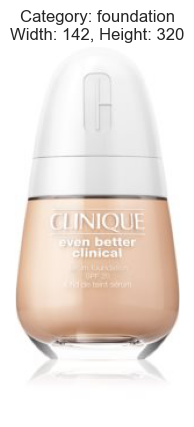

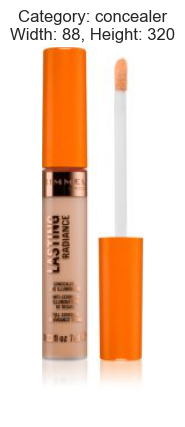

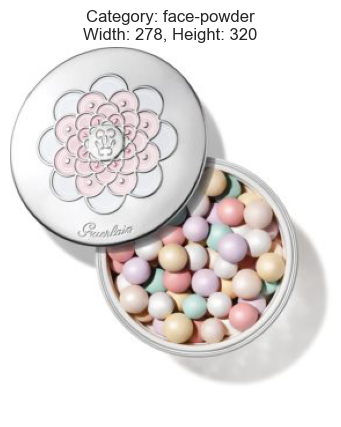

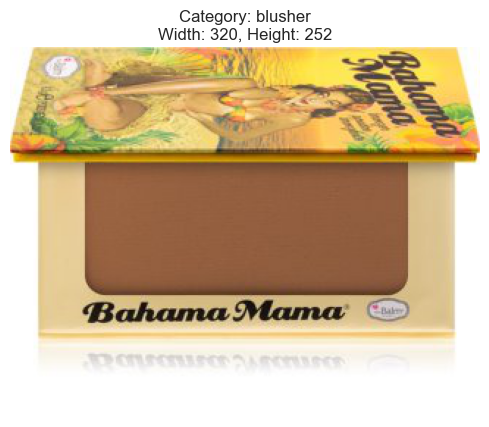

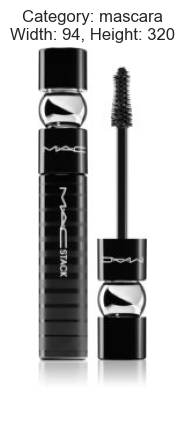

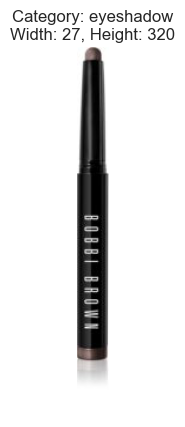

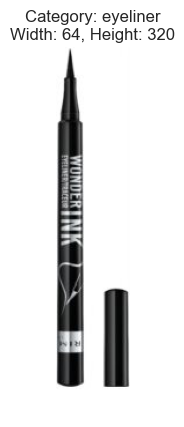

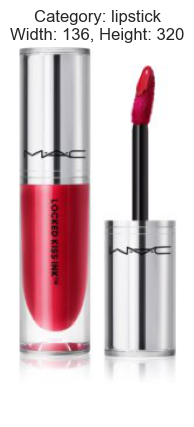

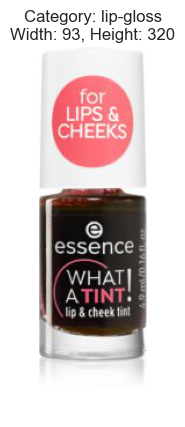

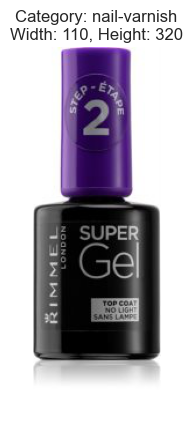

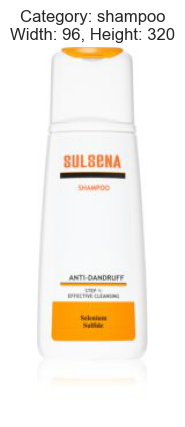

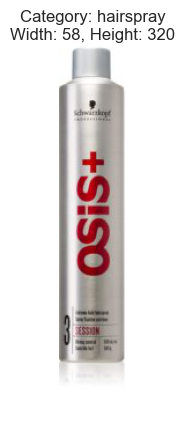

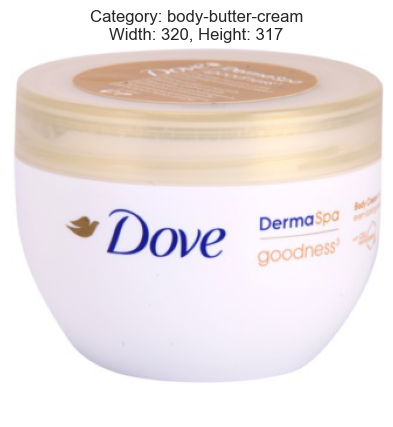

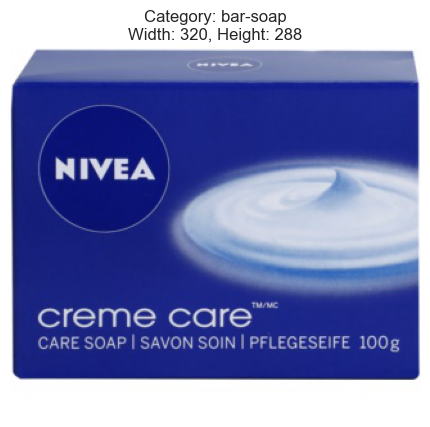

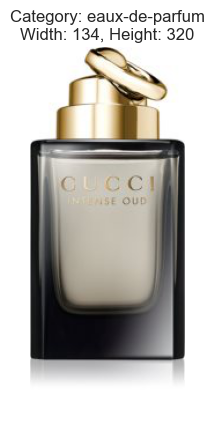

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import pickle
# Load the data from the pickle file
with open('images_labels_data.pkl', 'rb') as f:
    data = pickle.load(f)

# Create a dictionary to store one product's data per category
one_product_per_category = {}

# Iterate through the images and labels
for image, label in zip(data['images'], data['labels']):
    # Only consider the first product for each category
    if label not in one_product_per_category:
        one_product_per_category[label] = {'image': image}

# Function to display an image plot with its height and width
def display_image_plot(image, label):
    img = Image.open(BytesIO(image))
    plt.imshow(img)
    plt.title(f"Category: {label}\nWidth: {img.width}, Height: {img.height}")
    plt.axis('off')
    plt.show()

# Display image plots for one product from each category
for label, product_data in one_product_per_category.items():
    image = product_data['image']
    display_image_plot(image, label)



In [4]:
# Initialize variables for maximum height and width
max_height = 0
max_width = 0

# Iterate through the images and labels
for image in data['images']:
    img = Image.open(BytesIO(image))
    img_width, img_height = img.size
    max_width = max(max_width, img_width)
    max_height = max(max_height, img_height)

# Print the maximum height and width
print("Maximum Width:", max_width)
print("Maximum Height:", max_height)

Maximum Width: 320
Maximum Height: 320


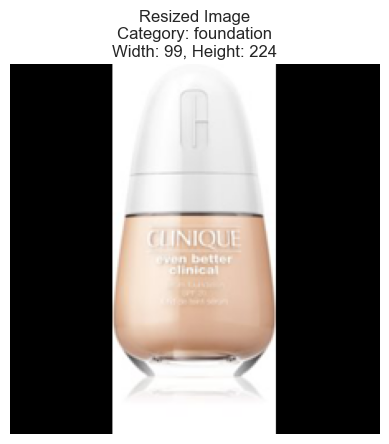

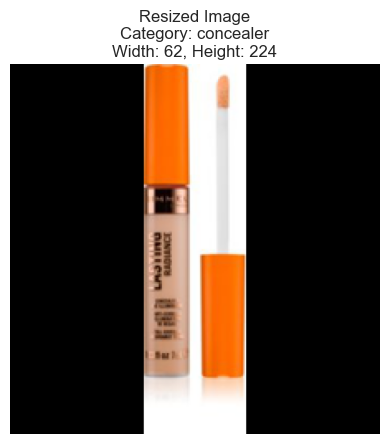

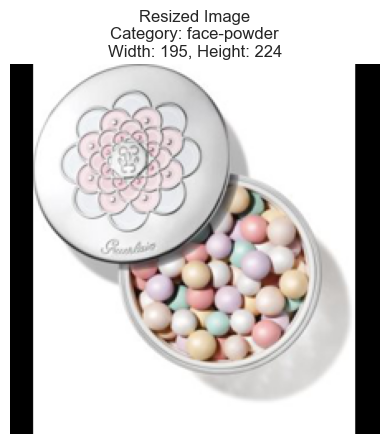

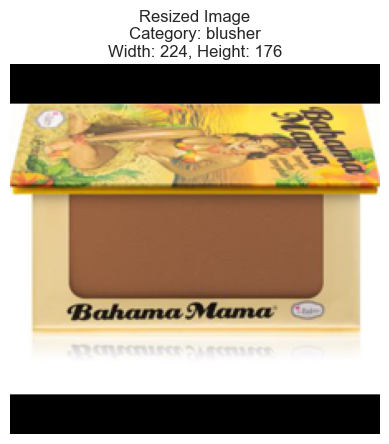

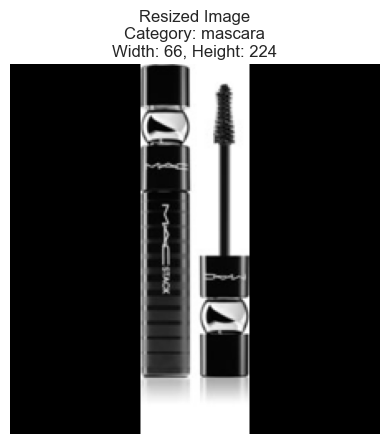

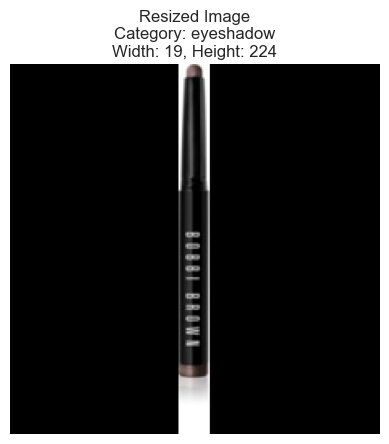

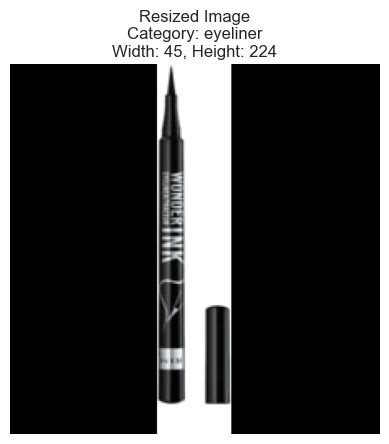

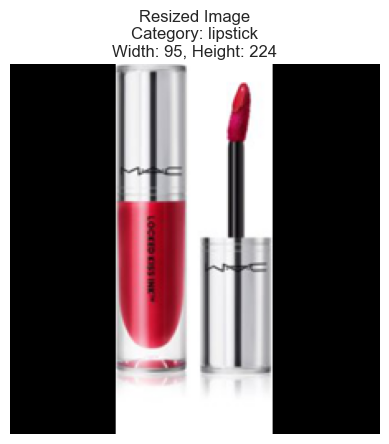

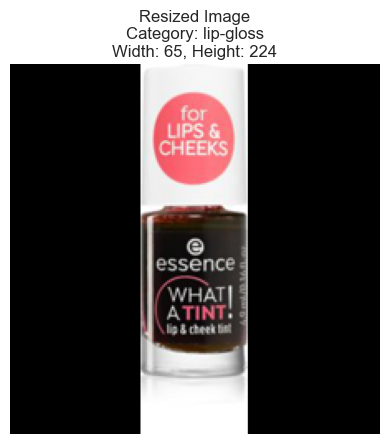

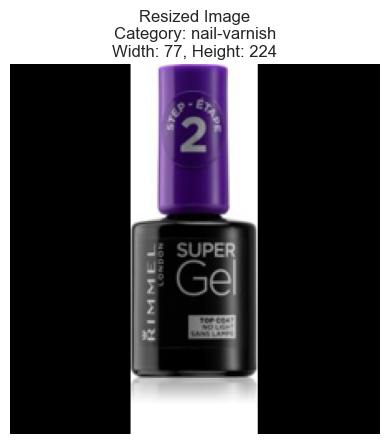

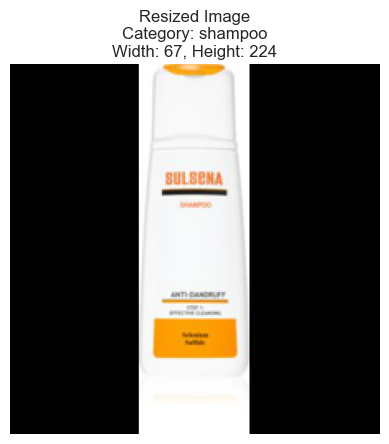

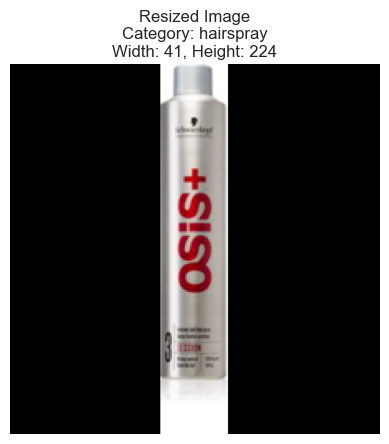

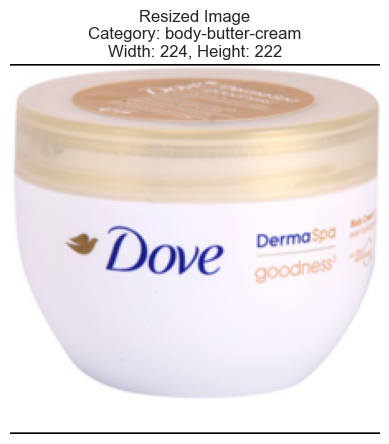

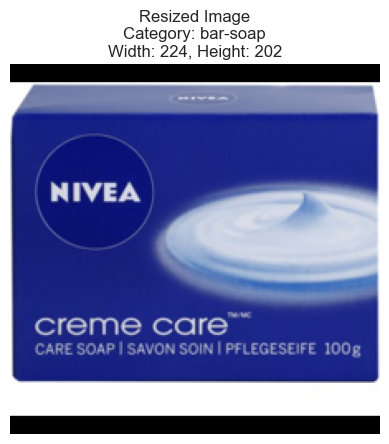

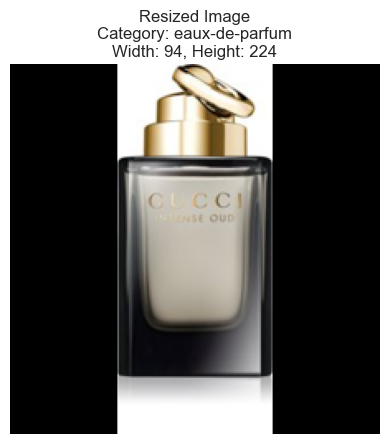

Processed Images Shape: (7687, 224, 224, 3)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Target size for ResNet-50 (assuming square images)
target_size = (224, 224)

# Create a dictionary to store one product's data per category
one_product_per_category = {}

# Iterate through the images and labels
for image, label in zip(data['images'], data['labels']):
    # Only consider the first product for each category
    if label not in one_product_per_category:
        one_product_per_category[label] = {'image': image}

# Initialize a list to store the processed images
processed_images = []

# Display one resized image from each category for padding check
for label, product_data in one_product_per_category.items():
    image = product_data['image']

    img = Image.open(BytesIO(image))
    # Resize while maintaining aspect ratio
    img.thumbnail(target_size)

    padded_img = Image.new('RGB', target_size)

    # Calculate padding
    left_pad = (target_size[0] - img.width) // 2
    upper_pad = (target_size[1] - img.height) // 2

    # Paste the resized image onto the new image with padding
    padded_img.paste(img, (left_pad, upper_pad))


    # Display the resized image for padding check
    plt.imshow(padded_img)
    plt.title(f"Resized Image\nCategory: {label}\nWidth: {img.width}, Height: {img.height}")
    plt.axis('off')
    plt.show()

# Iterate through all the images
for image in data['images']:
    img = Image.open(BytesIO(image))

    # Resize while maintaining aspect ratio
    img.thumbnail(target_size)

    # Create a new blank image of the target size
    padded_img = Image.new('RGB', target_size)

    # Calculate padding
    left_pad = (target_size[0] - img.width) // 2
    upper_pad = (target_size[1] - img.height) // 2

    # Paste the resized image onto the new image with padding
    padded_img.paste(img, (left_pad, upper_pad))

    # Convert the image to a numpy array
    padded_img_array = np.array(padded_img)

    processed_images.append(padded_img_array)

# Convert the list of processed images to a numpy array
processed_images = np.array(processed_images)

# Print the shape of the processed images array
print("Processed Images Shape:", processed_images.shape)

In [6]:
# Normalize the images to the range [0, 1]
normalized_images = processed_images.astype(np.float32) / 255.0
# Print the shape of the normalized images array
print("Normalized Images Shape:", normalized_images.shape)

Normalized Images Shape: (7687, 224, 224, 3)


In [7]:
unique_labels = np.unique(data['labels'])
print("Unique Labels:", unique_labels)
print("Label Data Type:", unique_labels.dtype)

Unique Labels: ['bar-soap' 'blusher' 'body-butter-cream' 'concealer' 'eaux-de-parfum'
 'eyeliner' 'eyeshadow' 'face-powder' 'foundation' 'hairspray' 'lip-gloss'
 'lipstick' 'mascara' 'nail-varnish' 'shampoo']
Label Data Type: <U17


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['labels'])  # Encode the original labels
print(encoded_labels)

[8 8 8 ... 4 4 4]


In [9]:
from sklearn.model_selection import train_test_split

# Assuming your normalized_images array contains the processed and normalized images
# and your labels array contains the corresponding category labels

# Convert labels to a numpy array
encoded_labels = np.array(encoded_labels)

# Perform a stratified split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(normalized_images, encoded_labels, test_size=0.2, stratify=encoded_labels, random_state=8)

# Further split the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=8)

# Print the shapes of the resulting sets
print("Train set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)
print("Test set shapes:", X_test.shape, y_test.shape)


Train set shapes: (5534, 224, 224, 3) (5534,)
Validation set shapes: (615, 224, 224, 3) (615,)
Test set shapes: (1538, 224, 224, 3) (1538,)


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Define the model architecture
model = keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output for dense layers
    layers.Flatten(),

    # Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout with a rate of 0.5 (you can adjust the rate)
    layers.Dense(len(unique_labels), activation='softmax')  # Output layer with softmax activation
])

# Define a learning rate schedule
def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Define an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[lr_scheduler, early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

# Print a message when early stopping is triggered
if early_stopping.stopped_epoch > 0:
    print("Early stopping triggered at epoch:", early_stopping.stopped_epoch)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 26, 26, 128)    

In [33]:
model_json = model.to_json()
with open('classifier_model_architecture.json', 'w') as f:
    f.write(model_json)

# Save the model weights to a .h5 file
model.save_weights('classifier_model_weights.h5')

In [34]:
model.save("classifier_model.h5")  # Save the model to a file named "my_model.h5"

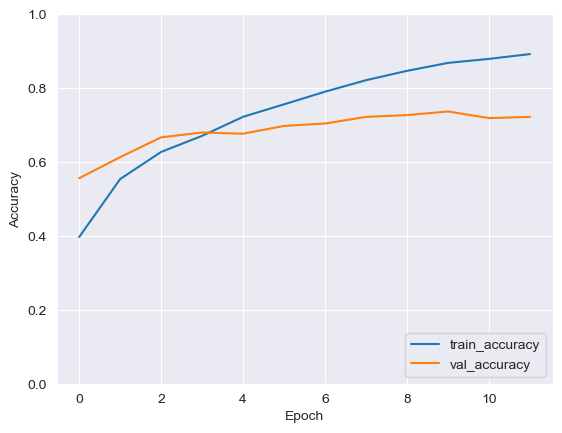

49/49 [==============================] - 5s 92ms/step


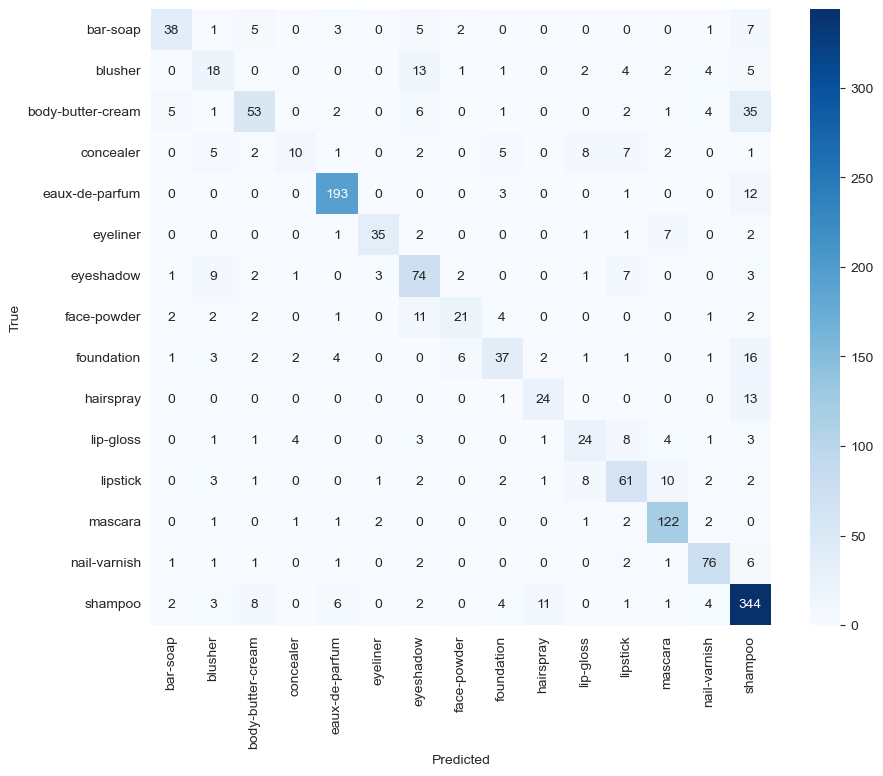

Classification Report:
                   precision    recall  f1-score   support

         bar-soap       0.76      0.61      0.68        62
          blusher       0.38      0.36      0.37        50
body-butter-cream       0.69      0.48      0.57       110
        concealer       0.56      0.23      0.33        43
   eaux-de-parfum       0.91      0.92      0.91       209
         eyeliner       0.85      0.71      0.78        49
        eyeshadow       0.61      0.72      0.66       103
      face-powder       0.66      0.46      0.54        46
       foundation       0.64      0.49      0.55        76
        hairspray       0.62      0.63      0.62        38
        lip-gloss       0.52      0.48      0.50        50
         lipstick       0.63      0.66      0.64        93
          mascara       0.81      0.92      0.87       132
     nail-varnish       0.79      0.84      0.81        91
          shampoo       0.76      0.89      0.82       386

         accuracy              

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Plot accuracy graph
plt.plot(history.history['accuracy'],
         label='train_accuracy')
plt.plot(history.history['val_accuracy'],
         label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,
                           axis=1)

# Create a confusion matrix
confusion_mtx = confusion_matrix(y_test,
                                 y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=unique_labels,
            yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test,
                            y_pred_classes,
                            target_names=unique_labels))